### Ejercicio clasificación con perceptrón MNIST

##### Preparación

In [1]:
# Importar librerías generales
import os
import zipfile

In [2]:
# Importar librerías de análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io

##### Preprocesamiento

In [3]:
# Abrir el archivo
zf = zipfile.ZipFile(os.getcwd() + '\\digitos_7.zip') 
df = pd.read_csv(zf.open('digitos_7.csv'))
df.shape

(70000, 785)

In [4]:
# Ver las primeras filas
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,clase7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [5]:
# Ver el conteo por clase
df['clase7'].value_counts()

False    62707
True      7293
Name: clase7, dtype: int64

In [6]:
# Separar en características (X) y etiquetas (Y)
X = df.drop('clase7', axis=1)
y = df['clase7']

In [7]:
# Convertir DataFrame en imágenes
img = np.array(X)
img = img.reshape((70000, 28, 28))
img.shape

(70000, 28, 28)

In [8]:
# Guardar las imágenes
# from skimage.util import img_as_ubyte
# 
# for i in range(img.shape[0]):
#     file = 'imagen_' + str(i) + '.jpg'
#     imagen = img_as_ubyte(img[i].astype(np.uint8))
#     io.imsave(file, imagen)

In [9]:
# Otra forma de guardar las imágenes
# import imageio
#
# for i in range(img.shape[0]):
#     file = 'imagen_' + str(i) + '.jpg'
#     imagen = img[i].astype(np.uint8)
#     imageio.imwrite(file, imagen)

C:\Users\frpm0\AppData\Local\Temp/ipykernel_12256/515629241.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  ax = io.imshow(rgb2gray(img[imagen]), cmap=plt.cm.gray);
c:\Users\frpm0\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


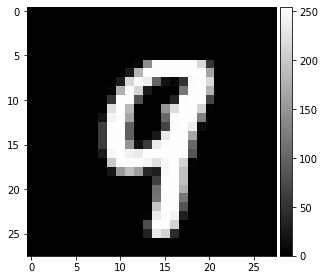

In [10]:
# Graficar una imagen
from skimage.color import rgb2gray

imagen = 800
fig, ax = plt.subplots(figsize=(8, 4))
ax = io.imshow(rgb2gray(img[imagen]), cmap=plt.cm.gray);

In [11]:
# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=99)
X_train.shape[0], X_test.shape[0]

(56000, 14000)

In [12]:
# Definir función para escalar
from sklearn.preprocessing import MinMaxScaler

def NormScaler(train_set, test_set):
    scaler = MinMaxScaler().fit(train_set)
    train_set_norm = pd.DataFrame(scaler.transform(train_set), columns=train_set.columns)
    test_set_norm = pd.DataFrame(scaler.transform(test_set), columns=test_set.columns)
    return train_set_norm, test_set_norm

In [13]:
# Escalar los conjuntos
X_train_norm, X_test_norm = NormScaler(X_train, X_test)

##### Usar el modelo del perceptrón

In [14]:
# Ajustar el modelo
from sklearn.linear_model import Perceptron

model = Perceptron(max_iter=100, penalty=None, random_state=99)
model.fit(X_train_norm, y_train)

Perceptron(max_iter=100, random_state=99)

In [15]:
# Ver el resumen del modelo
print('Épocas: ', model.n_iter_)
print(model.coef_.shape)
print(model.intercept_)

Épocas:  10
(1, 784)
[-9.]


In [16]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score, balanced_accuracy_score

y_pred = model.predict(X_test_norm)
print('Precisión: %.2f%%' % (accuracy_score(y_test, y_pred)*100))
print('Precisión balanceada: %.2f%%' % (balanced_accuracy_score(y_test, y_pred)*100))

Precisión: 97.99%
Precisión balanceada: 93.18%


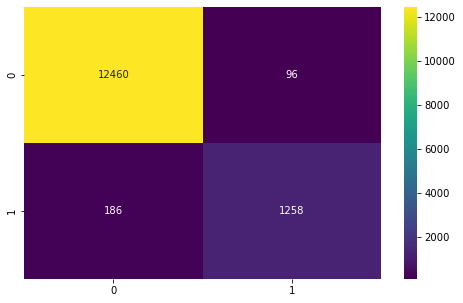

In [17]:
# Crear la matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
plt.show()